In [21]:
# Initialise API key
import os
openai_api_key = os.environ["OPENAI_API_KEY"]

# Import required libraries
from openai import OpenAI
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Define embedding model
EMBEDDING_MODEL = "text-embedding-ada-002"

In [32]:
# Load the dataset
import pandas as pd
reviews = pd.read_csv("womens_clothing_e-commerce_reviews.csv")

# Explore dataset: display the first few entries
reviews.head()

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [33]:
# Explore dataset: check dataset structure
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Review ID                1000 non-null   int64 
 1   Clothing ID              1000 non-null   int64 
 2   Age                      1000 non-null   int64 
 3   Title                    810 non-null    object
 4   Review Text              958 non-null    object
 5   Rating                   1000 non-null   int64 
 6   Recommended IND          1000 non-null   int64 
 7   Positive Feedback Count  1000 non-null   int64 
 8   Division Name            1000 non-null   object
 9   Department Name          1000 non-null   object
 10  Class Name               1000 non-null   object
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


In [34]:
# Create and store embeddings for reviews
review_texts = reviews["Review Text"].dropna()

client = OpenAI(api_key=openai_api_key)
response = client.embeddings.create(
    model=EMBEDDING_MODEL,
    input=review_texts.to_list()
)

response_dict = response.model_dump()
embeddings = [data["embedding"] for data in response_dict['data']]

In [35]:
# Reduce embeddings to a 2-dimensional array using t-SNE model
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

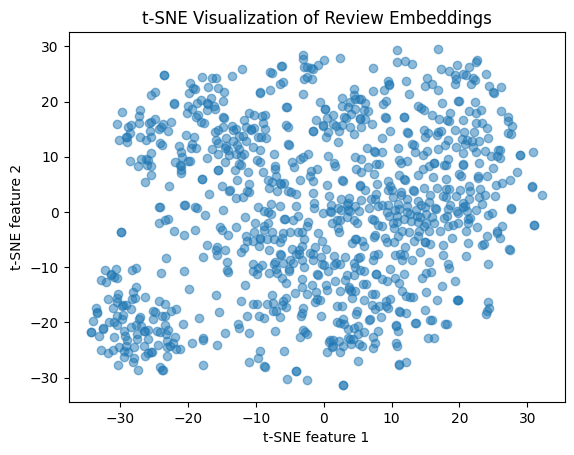

In [36]:
# Plot the 2D representation of the reviews
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], alpha=0.5)
plt.title("t-SNE Visualization of Review Embeddings")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.show()
plt.show()